In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input

from src.helpers.dataset import Dataset
from src.helpers.quadlet import generate_quadlet
from src.helpers.utils import show_image_list
from src.helpers.distance import euclidian_distance

In [2]:
dataset = Dataset()

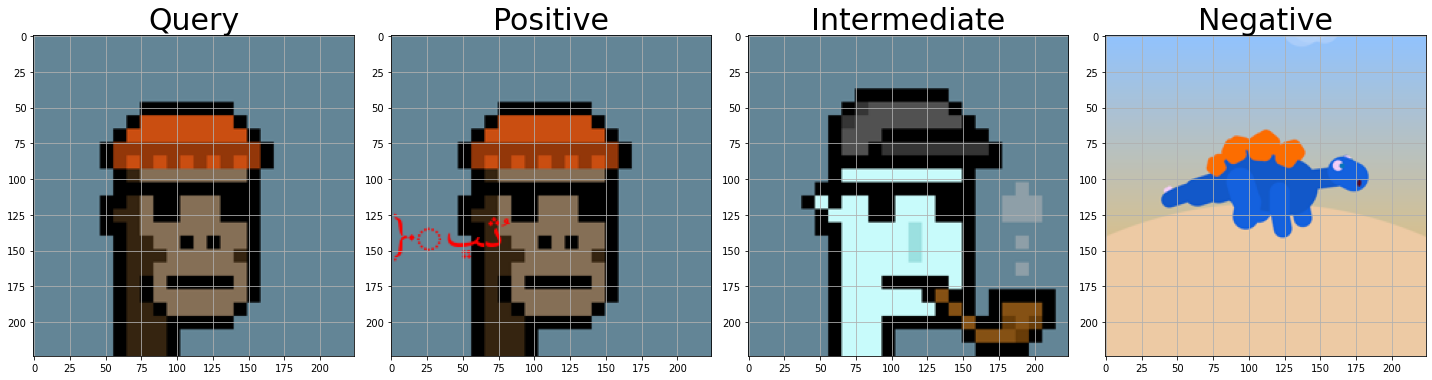

In [3]:
collection = random.choice(dataset.all_collections())
image_file = random.choice(dataset.collection_images(collection))
quadlet_data = generate_quadlet(collection, image_file)

show_image_list(quadlet_data, ['Query', 'Positive', 'Intermediate', 'Negative'], num_cols=4)

In [4]:
resnet = ResNet152V2()
features = resnet(
    np.array([preprocess_input(img) for img in quadlet_data])
)
features = [np.array(feat) for feat in features]

2021-11-07 23:24:55.907336: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(f'dist(query, positive)       : {np.sum(euclidian_distance(features[0], features[1])):.4f}')
print(f'dist(query, intermediate)   : {np.sum(euclidian_distance(features[0], features[2])):.4f}')
print(f'dist(query, negative)       : {np.sum(euclidian_distance(features[0], features[3])):.4f}')

dist(query, positive)       : 0.9879
dist(query, intermediate)   : 1.5165
dist(query, negative)       : 1.7861
